<a href="https://colab.research.google.com/github/SvetlanaZap/SvetlanaZap.github.io/blob/master/STudents_perf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Performance Project**
*   https://archive.ics.uci.edu/ml/datasets/Student+Performance
*   ***Attribute Information:***

1   school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

---


2   sex - student's sex (binary: 'F' - female or 'M' - male)

---


3   age - student's age (numeric: from 15 to 22)

---


4   address - student's home address type (binary: 'U' - urban or 'R' - rural)

---


5   famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

---


6   Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

---


7   Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

---


8   Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

---


9   Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

---


10   Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

---


11   reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

---


12   guardian - student's guardian (nominal: 'mother', 'father' or 'other')

---


13   traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

---


14   studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

---


15   failures - number of past class failures (numeric: n if 1<=n<3, else 4)

---


16   schoolsup - extra educational support (binary: yes or no)

---


17   famsup - family educational support (binary: yes or no)

---


18   paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

---


19   activities - extra-curricular activities (binary: yes or no)

---


20   nursery - attended nursery school (binary: yes or no)

---


21   higher - wants to take higher education (binary: yes or no)

---


22   internet - Internet access at home (binary: yes or no)

---


23   romantic - with a romantic relationship (binary: yes or no)

---


24   famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

---


25   freetime - free time after school (numeric: from 1 - very low to 5 - very high)

---


26   goout - going out with friends (numeric: from 1 - very low to 5 - very high)

---


27   Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

---


28   Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

---


29   health - current health status (numeric: from 1 - very bad to 5 - very good)

---


30   absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31   G1 - first period grade (numeric: from 0 to 20)

---


31   G2 - second period grade (numeric: from 0 to 20)

---


32   G3 - final grade (numeric: from 0 to 20, output target)






In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn.linear_model as linear_module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from google.colab import files
import matplotlib.pyplot as pyplot
%matplotlib inline

In [ ]:
uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


In [ ]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['student-mat.csv']), sep=';')
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
df = df1.copy()

In [ ]:
columns_to_encode = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [ ]:
df.shape

(395, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.isna().values.any()

False

In [ ]:
df.isnull().values.any()

False

In [ ]:
list(df.columns)

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

Apply encoding to predict

All object type columns should be encoded

In [ ]:
columns_to_encode = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [ ]:
for column in columns_to_encode:
    le = LabelEncoder()
    le.fit(df[column].values)
    df[column] = le.transform(df[column].values)
    df[column] = df[column].astype(float)
    print('column:', column, 'processed;')
df.head()

column: school processed;
column: sex processed;
column: address processed;
column: famsize processed;
column: Pstatus processed;
column: Mjob processed;
column: Fjob processed;
column: reason processed;
column: guardian processed;
column: schoolsup processed;
column: famsup processed;
column: paid processed;
column: activities processed;
column: nursery processed;
column: higher processed;
column: internet processed;
column: romantic processed;


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,18,1.0,0.0,0.0,4,4,0.0,4.0,0.0,1.0,2,2,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4,3,4,1,1,3,6,5,6,6
1,0.0,0.0,17,1.0,0.0,1.0,1,1,0.0,2.0,0.0,0.0,1,2,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5,3,3,1,1,3,4,5,5,6
2,0.0,0.0,15,1.0,1.0,1.0,1,1,0.0,2.0,2.0,1.0,1,2,3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,4,3,2,2,3,3,10,7,8,10
3,0.0,0.0,15,1.0,0.0,1.0,4,2,1.0,3.0,1.0,1.0,1,3,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,2,2,1,1,5,2,15,14,15
4,0.0,0.0,16,1.0,0.0,1.0,3,3,2.0,2.0,1.0,0.0,1,2,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    float64
 1   sex         395 non-null    float64
 2   age         395 non-null    int64  
 3   address     395 non-null    float64
 4   famsize     395 non-null    float64
 5   Pstatus     395 non-null    float64
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    float64
 9   Fjob        395 non-null    float64
 10  reason      395 non-null    float64
 11  guardian    395 non-null    float64
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    float64
 16  famsup      395 non-null    float64
 17  paid        395 non-null    float64
 18  activities  395 non-null    float64
 19  nursery     395 non-null    f

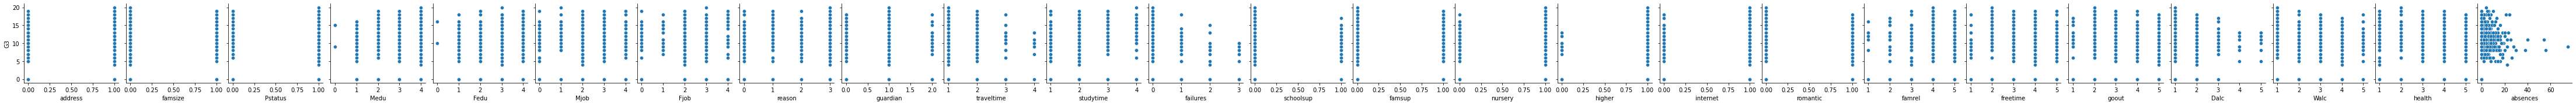

In [ ]:
sns.pairplot(df, y_vars='G3', x_vars=['address', 'famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime',
                                      'studytime','failures', 'schoolsup','famsup',
                                      'nursery', 'higher', 'internet','romantic','famrel',
                                      'freetime','goout','Dalc','Walc','health', 'absences'])

Find correlation between G3 score and different variables:

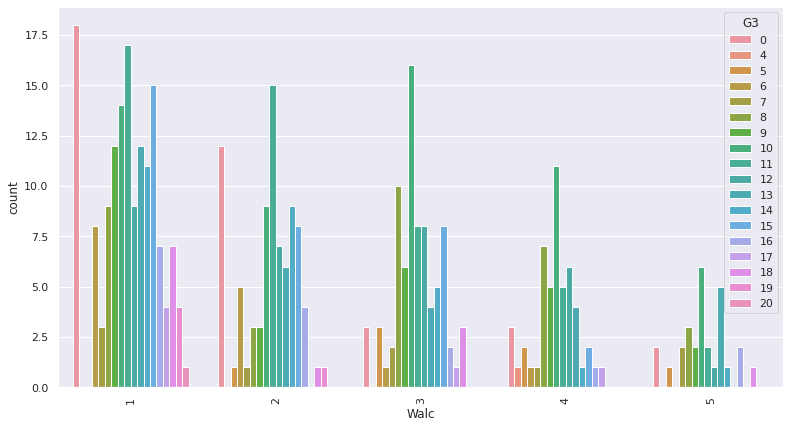

In [ ]:
#weekend alcohol comsuption
p = sns.countplot(x='Walc', data = df, hue='G3')
_ = plt.pyplot.setp(p.get_xticklabels(), rotation=90) 
sns.set(rc={'figure.figsize':(13,7)})

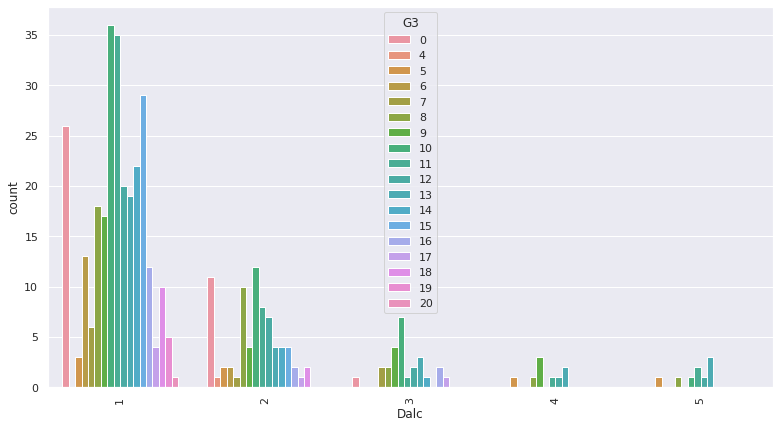

In [ ]:
#workday alcohol consumption
p = sns.countplot(x='Dalc', data = df, hue='G3')
_ = plt.pyplot.setp(p.get_xticklabels(), rotation=90) 
sns.set(rc={'figure.figsize':(13,7)})

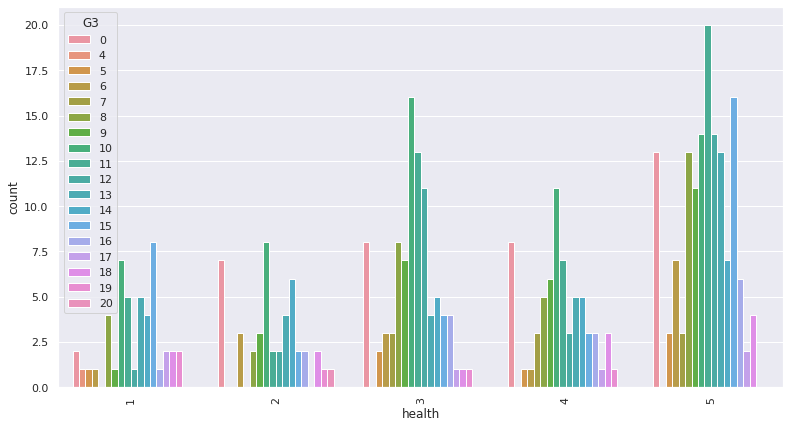

In [ ]:
#Health condition
p = sns.countplot(x='health', data = df, hue='G3')
_ = plt.pyplot.setp(p.get_xticklabels(), rotation=90) 
sns.set(rc={'figure.figsize':(13,6)})

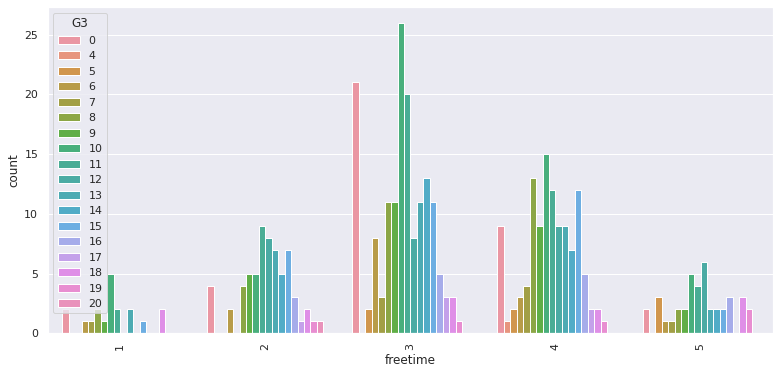

In [ ]:
#free time after school 
p = sns.countplot(x='freetime', data = df, hue='G3')
_ = plt.pyplot.setp(p.get_xticklabels(), rotation=90) 
sns.set(rc={'figure.figsize':(12,7)})

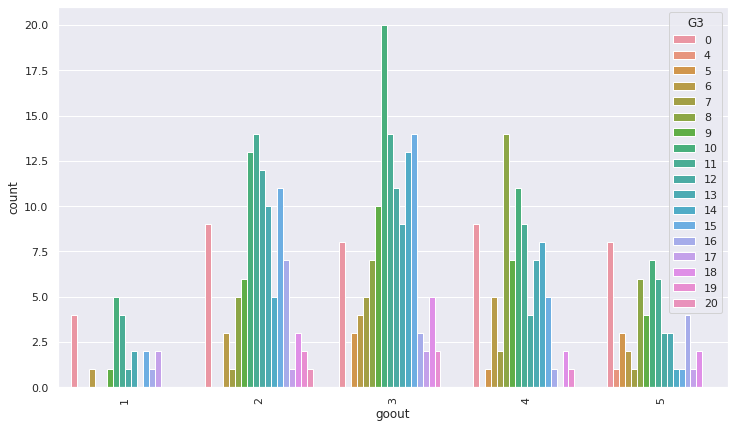

In [ ]:
#going out with friends
p = sns.countplot(x='goout', data = df, hue='G3')
_ = plt.pyplot.setp(p.get_xticklabels(), rotation=90) 
sns.set(rc={'figure.figsize':(15,8.27)})

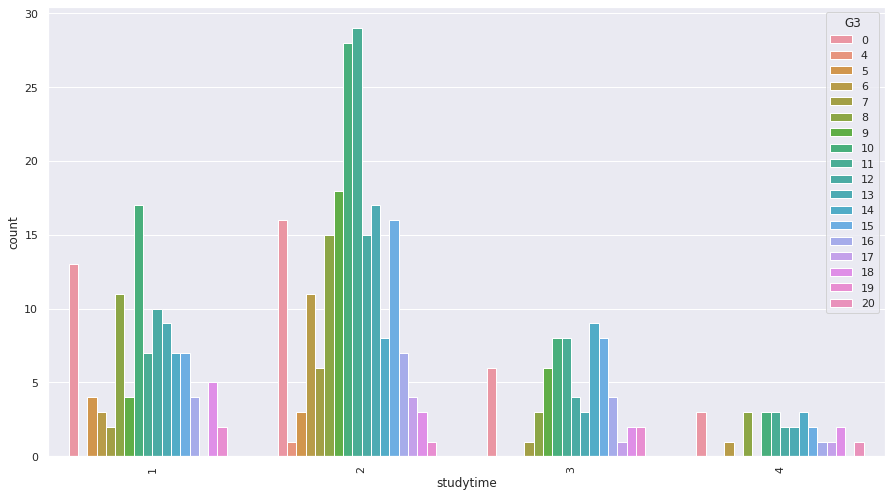

In [ ]:
#Study time
p = sns.countplot(x='studytime', data = df, hue='G3')
_ = plt.pyplot.setp(p.get_xticklabels(), rotation=90) 
sns.set(rc={'figure.figsize':(14,7)})

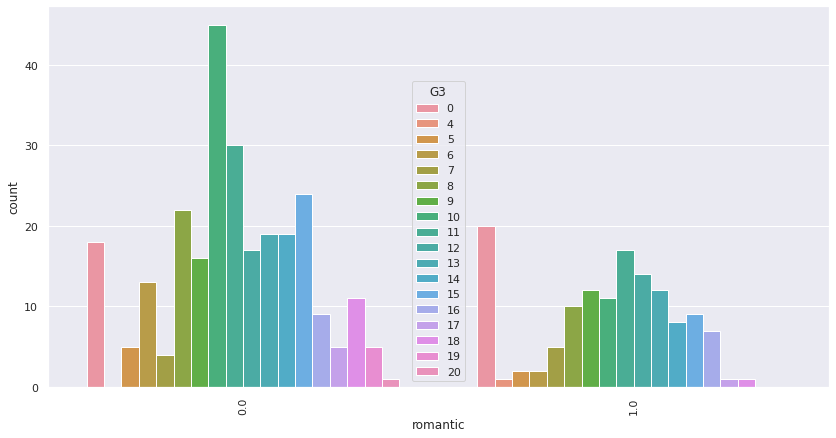

In [ ]:
#with a romantic relationship
p = sns.countplot(x='romantic', data = df, hue='G3')
_ = plt.pyplot.setp(p.get_xticklabels(), rotation=90) 
sns.set(rc={'figure.figsize':(15,8.27)})

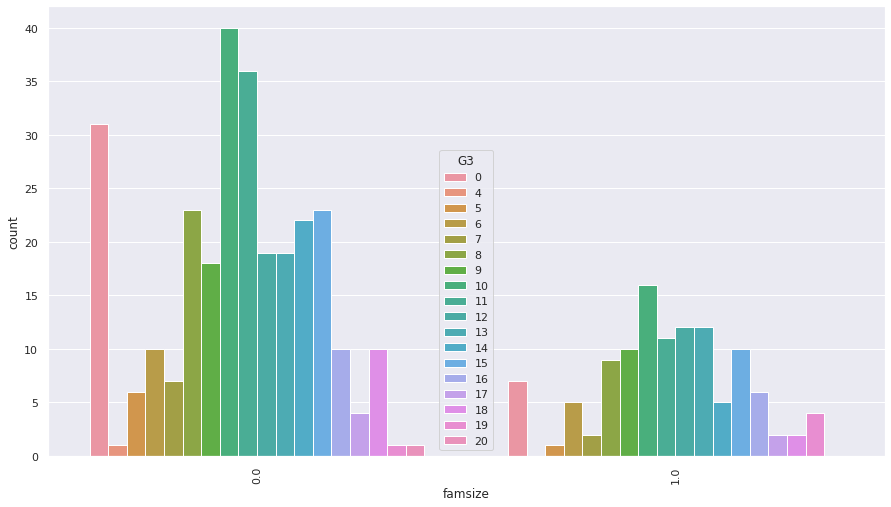

In [ ]:
#Family size (grater then 3, less then 3)
p = sns.countplot(x='famsize', data = df, hue='G3')
_ = plt.pyplot.setp(p.get_xticklabels(), rotation=90) 
sns.set(rc={'figure.figsize':(13,7)})

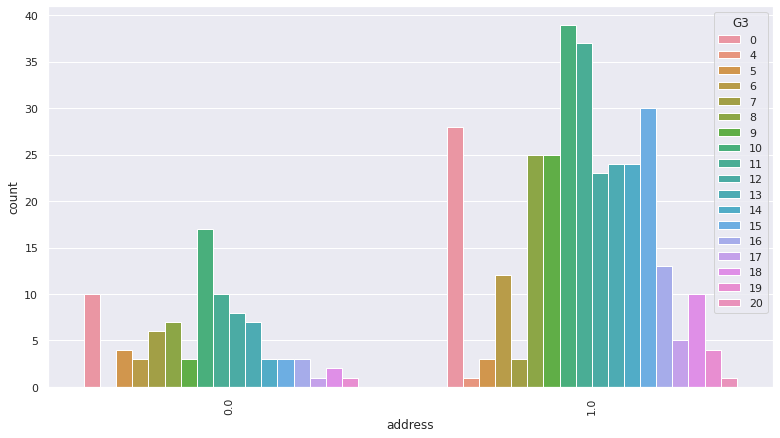

In [ ]:
#student's home address type (urban - rural)
p = sns.countplot(x='address', data = df, hue='G3')
_ = plt.pyplot.setp(p.get_xticklabels(), rotation=90) 
sns.set(rc={'figure.figsize':(13,7)})

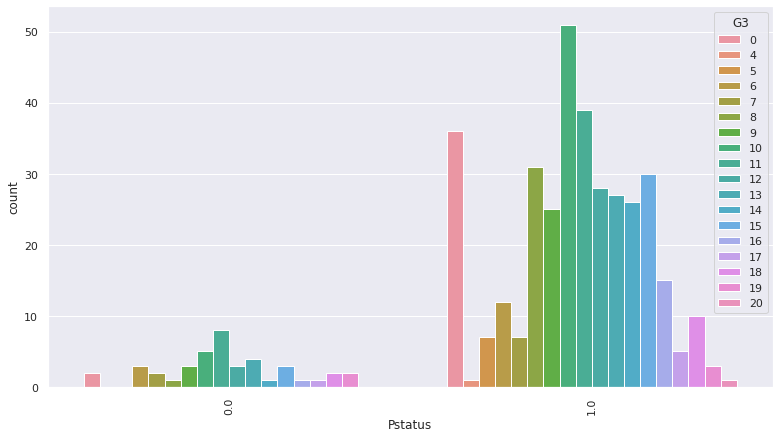

In [ ]:
#Parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
p = sns.countplot(x='Pstatus', data = df, hue='G3')
_ = plt.pyplot.setp(p.get_xticklabels(), rotation=90) 
sns.set(rc={'figure.figsize':(13,7)})

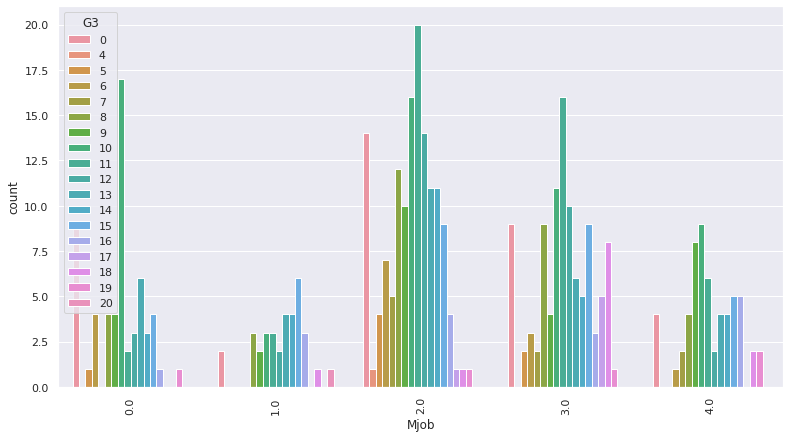

In [ ]:
#Mother's job
p = sns.countplot(x='Mjob', data = df, hue='G3')
_ = plt.pyplot.setp(p.get_xticklabels(), rotation=90) 
sns.set(rc={'figure.figsize':(13,7)})

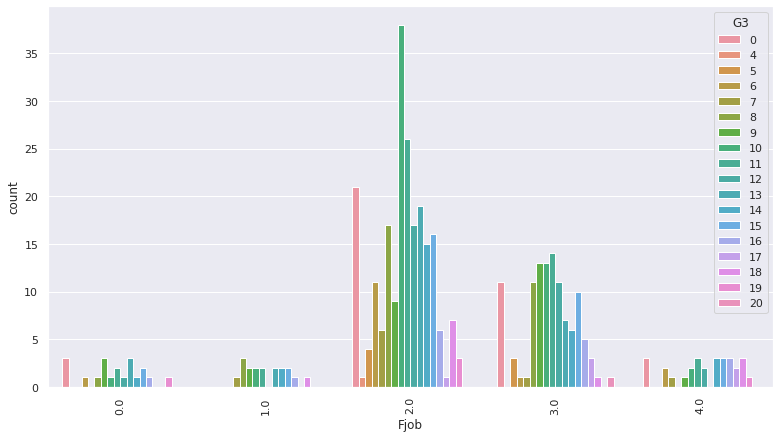

In [ ]:
#Father's job
p = sns.countplot(x='Fjob', data = df, hue='G3')
_ = plt.pyplot.setp(p.get_xticklabels(), rotation=90) 
sns.set(rc={'figure.figsize':(13,7)})

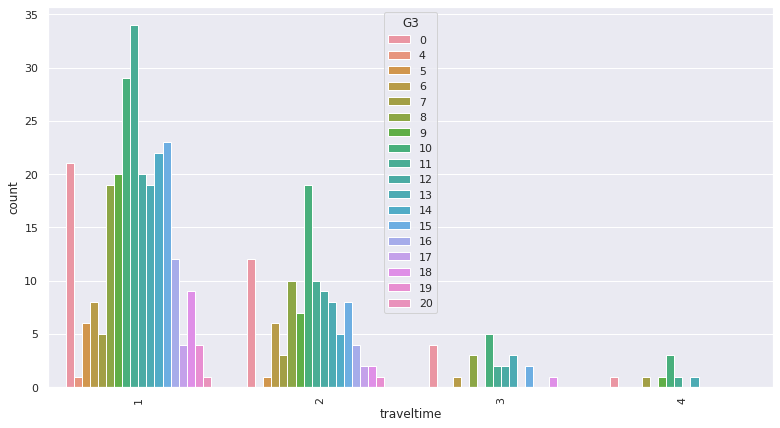

In [ ]:
#home to school travel time (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
p = sns.countplot(x='traveltime', data = df, hue='G3')
_ = plt.pyplot.setp(p.get_xticklabels(), rotation=90) 
sns.set(rc={'figure.figsize':(13,7)})

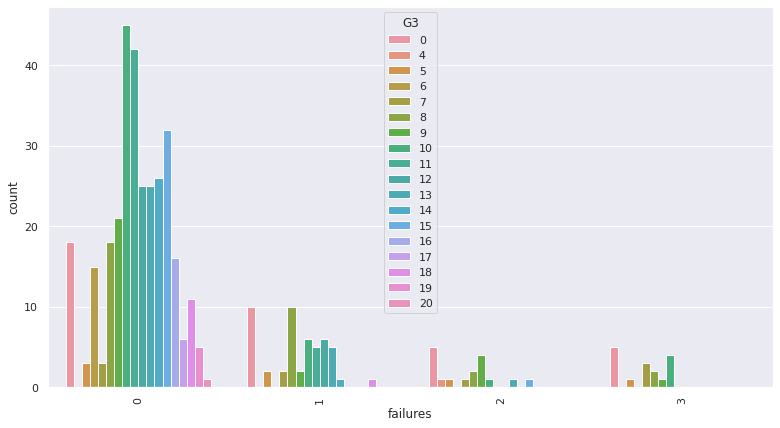

In [ ]:
#number of past class failures
p = sns.countplot(x='failures', data = df, hue='G3')
_ = plt.pyplot.setp(p.get_xticklabels(), rotation=90) 
sns.set(rc={'figure.figsize':(13,7)})

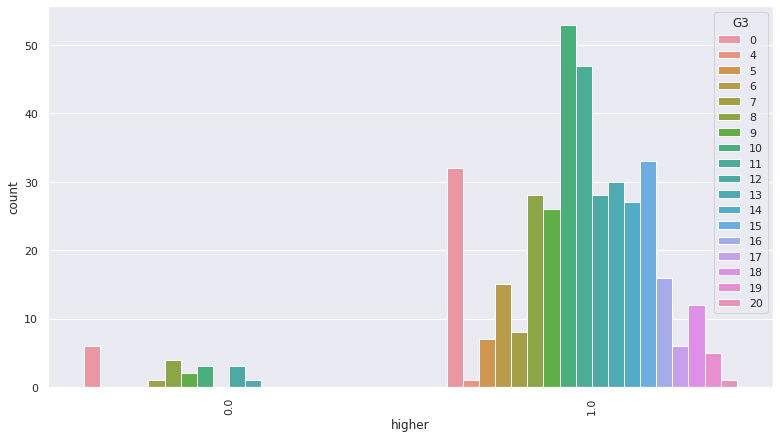

In [ ]:
#wants to take higher education
p = sns.countplot(x='higher', data = df, hue='G3')
_ = plt.pyplot.setp(p.get_xticklabels(), rotation=90) 
sns.set(rc={'figure.figsize':(13,7)})

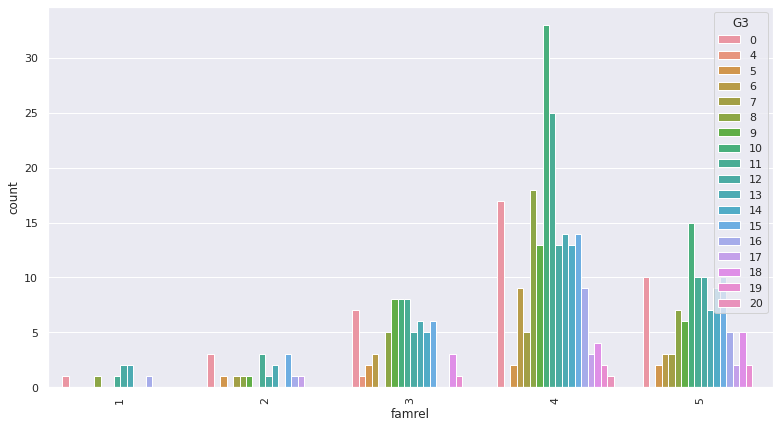

In [ ]:
#quality of family relationships (from 1 - very bad to 5 - excellent)
p = sns.countplot(x='famrel', data = df, hue='G3')
_ = plt.pyplot.setp(p.get_xticklabels(), rotation=90) 
sns.set(rc={'figure.figsize':(13,7)})

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,-0.090010,0.011109,0.242308,-0.090681,0.059804,-0.139789,-0.164967,-0.017083,-0.116946,-0.089277,-0.024150,-0.133578,0.060700,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,-0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,-0.095867,-0.071343,0.059722,-0.306268,0.044436,-0.138271,-0.151623,-0.129126,0.099833,-0.008203,-0.151056,0.044113,-0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,-0.015337,0.290485,0.070641,-0.004140,0.243665,-0.251811,-0.140609,-0.035933,-0.103063,-0.086632,-0.209081,-0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
address,-0.279797,-0.028504,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,-0.047891,-0.044512,-0.328096,-0.020912,-0.078578,0.024712,0.023903,0.052800,-0.051360,0.059589,0.042854,0.216842,0.005257,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.027874,0.069704,0.126037,0.105756
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,-0.019212,-0.002718,0.063493,-0.073595,-0.015769,-0.028642,-0.112893,-0.013882,-0.000113,0.102088,-0.005806,0.000720,0.034395,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.071445,0.081223,0.081407
Pstatus,0.045923,0.023443,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,-0.003553,-0.108715,0.028265,0.024294,-0.003339,-0.042238,0.019067,0.046435,0.097352,-0.090615,-0.040735,0.070074,-0.040451,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Medu,-0.133333,0.078228,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,0.117653,-0.023918,-0.171639,0.064944,-0.236680,-0.036029,0.183727,0.159700,0.108277,0.193263,0.168845,0.201463,0.039681,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.079807,0.034878,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,0.043099,-0.133644,-0.158194,-0.009175,-0.250408,0.037530,0.185496,0.086981,0.112643,0.157177,0.174566,0.127507,0.015602,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mjob,-0.056670,0.191421,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,0.022022,0.014787,-0.109752,-0.023097,-0.073377,-0.040958,0.050667,0.096566,0.098754,0.095848,0.097887,0.216969,-0.062999,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.050254,0.081674,0.097390,0.102082
Fjob,0.018974,0.084957,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,-0.027688,-0.080511,0.055878,-0.076817,-0.008275,-0.011657,-0.030159,-0.040435,0.032391,-0.030812,-0.045250,0.035777,-0.000583,0.013709,-0.047475,0.010340,0.077897,0.070024,-0.018058,0.008196,0.057661,0.067006,0.042286


High correlation observed for columns Medu, Fedu, Walc and Dalc. We'll drop Walc and Medu

In [ ]:
df2 = df.drop(['Walc', 'Medu'], axis=1)

Get train and test data

In [ ]:
df_Y = df2['G3'].values
df_X = df2.loc[:, df2.columns[:-3]].values.astype('float32')

df_X_train, df_X_test, df_Y_train, df_Y_test = train_test_split(df_X, df_Y, test_size=0.25, random_state=1)

In [ ]:
type(df_X_train)

numpy.ndarray

In [ ]:
print(df_X_train.shape)
print(df_X_test.shape)

(296, 28)
(99, 28)


In [ ]:
df.shape

(395, 33)

In [ ]:
df_X_train[0]

array([ 0.,  1., 16.,  1.,  0.,  1.,  3.,  3.,  2.,  1.,  0.,  1.,  3.,
        0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  5.,  3.,  3.,  1.,
        5.,  2.], dtype=float32)

In [ ]:
scaler = StandardScaler()
scaler.fit(df_X_train)
df_X_train = scaler.transform(df_X_train)
df_X_test = scaler.transform(df_X_test)

In [ ]:
df_X_train[0]

array([-0.33583027,  1.0555973 , -0.5137688 ,  0.556538  , -0.6451883 ,
        0.39528468,  0.4064033 ,  0.6683413 , -0.3317621 , -0.1962982 ,
       -1.6165227 , -0.5903839 ,  1.1339339 , -0.46043298, -0.35422492,
        0.81994903, -0.8971499 ,  1.        ,  0.48835823,  0.23104282,
        0.45624915, -0.71428573,  1.165204  , -0.2176317 , -0.12829946,
       -0.56065685,  1.0180436 , -0.44349256], dtype=float32)

In [ ]:
#model_L = LogisticRegression(max_iter=100, C=0.75)

model_L = LogisticRegression(max_iter=100, C=0.75)


model_L.fit(df_X_train, df_Y_train)

# make predictions
expected = df_Y_test
predicted = model_L.predict(df_X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
cm_L = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix: \n", cm_L)

              precision    recall  f1-score   support

           0       0.47      0.88      0.61         8
           5       0.00      0.00      0.00         2
           6       0.12      0.25      0.17         4
           7       0.00      0.00      0.00         2
           8       0.12      0.25      0.17         8
           9       0.00      0.00      0.00         7
          10       0.50      0.19      0.28        21
          11       0.18      0.13      0.15        15
          12       0.25      0.12      0.17         8
          13       0.14      0.12      0.13         8
          14       0.00      0.00      0.00         4
          15       0.25      0.40      0.31         5
          16       0.14      0.33      0.20         3
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2

    accuracy                           0.21        99
   macro avg       0.14   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
model_L_accuracy = model_L.score(df_X_test, df_Y_test)
print(f"Accuracy of Logistic Regression Classifier is:{model_L_accuracy}")

Accuracy of Logistic Regression Classifier is:0.21212121212121213


In [ ]:
def plot_cm(cm):   
    unique = ['0', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
    df_cm = pd.DataFrame(cm, index=unique, columns=unique)
    fig = pyplot.figure(figsize=(10,10))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu",linecolor="blue",linewidths=1.0)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')
    pyplot.show()

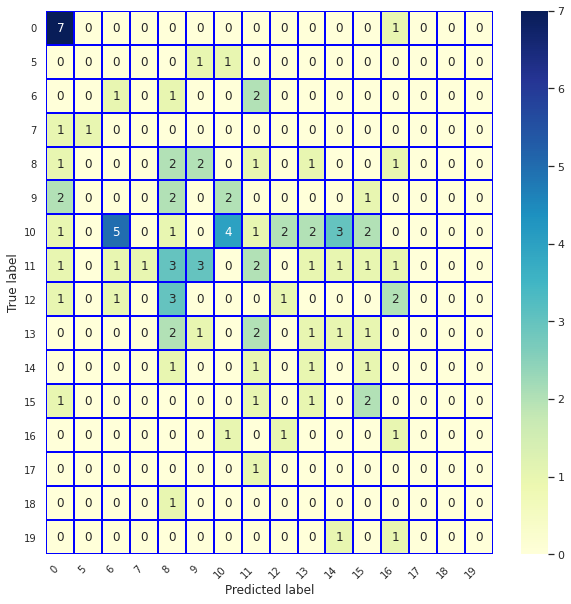

In [ ]:
plot_cm(cm_L)

Inference: Accuracy is just 0.21. Logistic regression is not a good model to predict this data.

Neural Network

In [49]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,), random_state=43, max_iter=1000, learning_rate='adaptive')
nn_model.fit(df_X_train, df_Y_train)
nn_accuracy = nn_model.score(df_X_test, df_Y_test)
print(f"Accuracy of MLP Classifier is:{nn_accuracy}")

Accuracy of MLP Classifier is:0.1414141414141414


XgBoost

In [50]:
    import xgboost as xgb


In [57]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(df_X_train, df_Y_train)
print(); print(model_xgb)

[00:02:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [58]:
expected_y  = df_Y_test
predicted_y = model_xgb.predict(df_X_test)

In [60]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

0.18338187365292902
0.37157715951361675


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


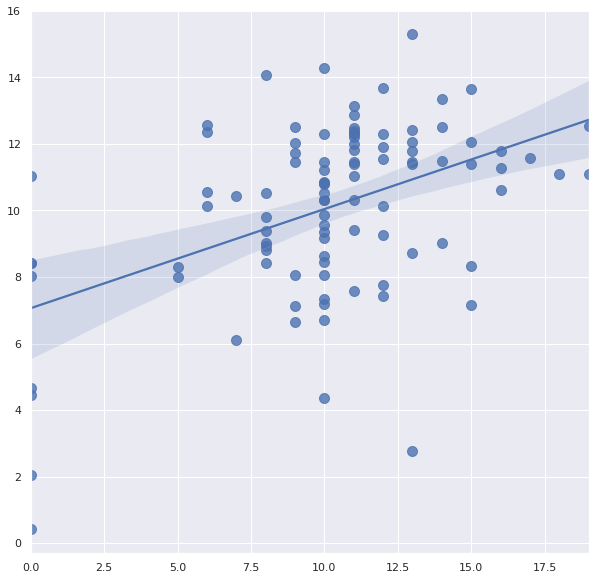

In [62]:
pyplot.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})